**Instructor**: Prof. Keith Chugg (chugg@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

In [2]:
# pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
def plot_histo_classes(df_train, df_test, label):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1_plot = df_train.groupby(label).size().plot(kind='bar', color=['red', 'green', 'blue'], edgecolor='black', ax=ax1)
    ax1.set_xlabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    ax1.set_title("Train")

    ax2_plot = df_test.groupby(label).size().plot(kind='bar', color=['red', 'green', 'blue'], edgecolor='black', ax = ax2)
    ax2.set_xlabel("")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    ax2.set_title("Test")
    plt.tight_layout()
    plt.show()

In [4]:
def draw_distributions_box_plot(y_df, x_df, start_feature, end_feature, label):
    colors = ['red', 'green', 'blue']
    data = pd.concat([y_df,x_df.iloc[:,start_feature:end_feature]],axis=1)
    data = pd.melt(data,id_vars=label,
                        var_name="Features",
                        value_name='Value')
    fig, ax = plt.subplots(figsize=(20,7))
    sns.violinplot(x="Features", y="Value", hue=label, data=data,split=True, inner="quart",palette =colors) #Draw a combination of boxplot and kernel density estimate.
    ax.set_xlabel("")
    plt.xticks(rotation=90)
    plt.show()

In [5]:
def check_nan(df):
  for col in df.columns:
    count = df[col].isnull().sum()
    print(f"Does df[{col}] contain NaN? {'Yes' if count > 0 else 'No'} - Count: {count}")

In [6]:
def plot_pairplot(y_df, x_df, start_feature, end_feature, label):
    colors = ['red', 'green', 'blue']
    data = pd.concat([y_df,x_df.iloc[:,start_feature:end_feature]],axis=1)
    grid=sns.pairplot(data=data,kind ="scatter",hue=label,palette=colors)
    plt.show()

## Loading Data

In [7]:
wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

In [8]:
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

## Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2)

In [10]:
print('x_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (142, 13)
y_train.shape:  (142, 1)
x_test.shape:  (36, 13)
y_test.shape:  (36, 1)


In [11]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=y.columns)
y_test_df = pd.DataFrame(y_test, columns=y.columns)
wine_df_train = pd.concat([X_train_df, y_train_df], axis=1)
wine_df_test = pd.concat([X_test_df, y_test_df], axis=1)

## Exploratory Data Analysis

In [12]:
check_nan(wine_df_train)

Does df[Alcohol] contain NaN? No - Count: 0
Does df[Malicacid] contain NaN? No - Count: 0
Does df[Ash] contain NaN? No - Count: 0
Does df[Alcalinity_of_ash] contain NaN? No - Count: 0
Does df[Magnesium] contain NaN? No - Count: 0
Does df[Total_phenols] contain NaN? No - Count: 0
Does df[Flavanoids] contain NaN? No - Count: 0
Does df[Nonflavanoid_phenols] contain NaN? No - Count: 0
Does df[Proanthocyanins] contain NaN? No - Count: 0
Does df[Color_intensity] contain NaN? No - Count: 0
Does df[Hue] contain NaN? No - Count: 0
Does df[0D280_0D315_of_diluted_wines] contain NaN? No - Count: 0
Does df[Proline] contain NaN? No - Count: 0
Does df[class] contain NaN? No - Count: 0


In [13]:
check_nan(wine_df_test)

Does df[Alcohol] contain NaN? No - Count: 0
Does df[Malicacid] contain NaN? No - Count: 0
Does df[Ash] contain NaN? No - Count: 0
Does df[Alcalinity_of_ash] contain NaN? No - Count: 0
Does df[Magnesium] contain NaN? No - Count: 0
Does df[Total_phenols] contain NaN? No - Count: 0
Does df[Flavanoids] contain NaN? No - Count: 0
Does df[Nonflavanoid_phenols] contain NaN? No - Count: 0
Does df[Proanthocyanins] contain NaN? No - Count: 0
Does df[Color_intensity] contain NaN? No - Count: 0
Does df[Hue] contain NaN? No - Count: 0
Does df[0D280_0D315_of_diluted_wines] contain NaN? No - Count: 0
Does df[Proline] contain NaN? No - Count: 0
Does df[class] contain NaN? No - Count: 0


In [14]:
wine_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       142 non-null    float64
 1   Malicacid                     142 non-null    float64
 2   Ash                           142 non-null    float64
 3   Alcalinity_of_ash             142 non-null    float64
 4   Magnesium                     142 non-null    float64
 5   Total_phenols                 142 non-null    float64
 6   Flavanoids                    142 non-null    float64
 7   Nonflavanoid_phenols          142 non-null    float64
 8   Proanthocyanins               142 non-null    float64
 9   Color_intensity               142 non-null    float64
 10  Hue                           142 non-null    float64
 11  0D280_0D315_of_diluted_wines  142 non-null    float64
 12  Proline                       142 non-null    float64
 13  class

In [15]:
wine_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       36 non-null     float64
 1   Malicacid                     36 non-null     float64
 2   Ash                           36 non-null     float64
 3   Alcalinity_of_ash             36 non-null     float64
 4   Magnesium                     36 non-null     float64
 5   Total_phenols                 36 non-null     float64
 6   Flavanoids                    36 non-null     float64
 7   Nonflavanoid_phenols          36 non-null     float64
 8   Proanthocyanins               36 non-null     float64
 9   Color_intensity               36 non-null     float64
 10  Hue                           36 non-null     float64
 11  0D280_0D315_of_diluted_wines  36 non-null     float64
 12  Proline                       36 non-null     float64
 13  class  

In [16]:
label = 'class'

In [17]:
wine_df_train.describe()

Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.967254    2.350423    2.370563          19.619718   99.500000   
std      0.782644    1.126012    0.269769           3.233584   14.296133   
min     11.030000    0.890000    1.700000          11.200000   70.000000   
25%     12.370000    1.630000    2.202500          17.425000   88.000000   
50%     13.010000    1.830000    2.355000          19.500000   98.000000   
75%     13.580000    3.082500    2.575000          21.500000  107.000000   
max     14.750000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.306761    2.066056              0.363803         1.629648   
std         0.651134    1.005986              0.125990         0.589015   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.685000    1.227500              0.270000         1.257500   
50%         2.415000    2.180000              0.340000         1.625000   
75%         2.822500    2.907500              0.465000         1.970000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  0D280_0D315_of_diluted_wines      Proline  \
count       142.000000  142.000000                    142.000000   142.000000   
mean          5.006972    0.957437                      2.618592   742.570423   
std           2.289912    0.220966                      0.696050   319.449225   
min           1.280000    0.540000                      1.270000   278.000000   
25%           3.255000    0.790000                      2.002500   504.000000   
50%           4.600000    0.965000                      2.795000   660.000000   
75%           6.075000    1.120000                      3.170000   961.750000   
max          13.000000    1.710000                      3.920000  1680.000000   

            class  
count  142.000000  
mean     1.936620  
std      0.764596  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [18]:
wine_df_test.describe()

Alcohol  Malicacid        Ash  Alcalinity_of_ash   Magnesium  \
count  36.000000  36.000000  36.000000          36.000000   36.000000   
mean   13.132222   2.280833   2.350556          19.002778  100.694444   
std     0.918157   1.095256   0.295151           3.737034   14.390115   
min    11.410000   0.740000   1.360000          10.600000   78.000000   
25%    12.200000   1.477500   2.237500          16.450000   90.750000   
50%    13.300000   1.880000   2.380000          19.500000   97.500000   
75%    13.915000   3.052500   2.515000          21.625000  107.750000   
max    14.830000   5.190000   2.840000          27.000000  151.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count      36.000000   36.000000             36.000000        36.000000   
mean        2.249167    1.884167              0.354167         1.438056   
std         0.519705    0.970315              0.119604         0.478443   
min         1.400000    0.500000              0.140000         0.420000   
25%         1.845000    0.880000              0.267500         1.247500   
50%         2.200000    1.845000              0.325000         1.385000   
75%         2.602500    2.650000              0.430000         1.600000   
max         3.300000    3.640000              0.630000         2.960000   

       Color_intensity        Hue  0D280_0D315_of_diluted_wines      Proline  \
count        36.000000  36.000000                     36.000000    36.000000   
mean          5.259722   0.957500                      2.584444   763.944444   
std           2.449966   0.259828                      0.772330   300.030850   
min           1.950000   0.480000                      1.300000   355.000000   
25%           2.937500   0.700000                      1.797500   500.000000   
50%           5.075000   0.985000                      2.705000   714.000000   
75%           7.350000   1.140000                      3.212500  1035.000000   
max          10.800000   1.450000                      4.000000  1547.000000   

           class  
count  36.000000  
mean    1.944444  
std     0.826160  
min     1.000000  
25%     1.000000  
50%     2.000000  
75%     3.000000  
max     3.000000

In [19]:
duplicate_rows = wine_df_train[wine_df_train.duplicated(keep=False)]
print("Duplicate data: \n", duplicate_rows)

Duplicate data: 
 Empty DataFrame
Columns: [Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline, class]
Index: []


In [20]:
duplicate_rows = wine_df_test[wine_df_test.duplicated(keep=False)]
print("Duplicate data: \n", duplicate_rows)

Duplicate data: 
 Empty DataFrame
Columns: [Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline, class]
Index: []


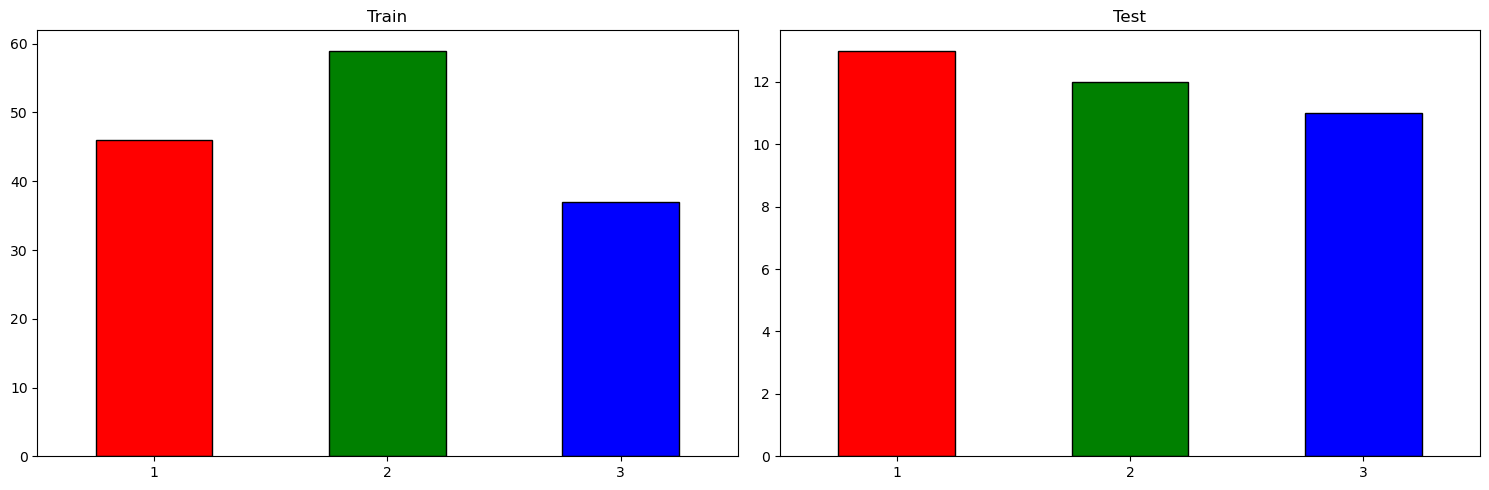

In [21]:
plot_histo_classes(wine_df_train, wine_df_test, label = label)

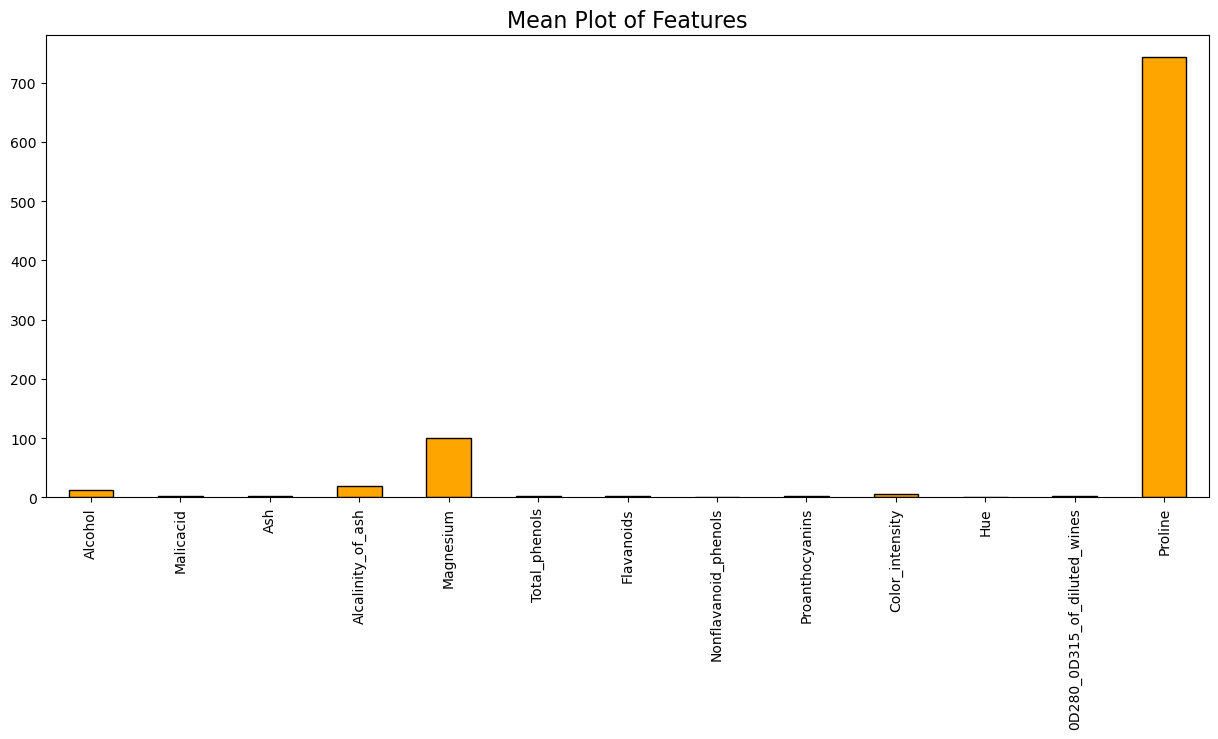

In [22]:
data_mean = wine_df_train[wine_df_train.columns[0:-1]].describe().loc['mean']
data_mean.plot(kind='bar', figsize=(15,6), color='orange', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Mean Plot of Features', fontsize=16)
plt.show()

## Data Normalization

In [23]:
std_scaler = StandardScaler()
x_train_df_normalized = pd.DataFrame(std_scaler.fit_transform(X_train_df), columns=X_train_df.columns)
data_mean = x_train_df_normalized.describe().loc['mean']
data_mean
# data_mean.plot(kind='bar', figsize=(14,6))
# plt.title('Mean Plot of Normalized Features', fontsize=16)
# plt.show()

Alcohol                         1.559942e-14
Malicacid                       2.251720e-16
Ash                             2.564459e-15
Alcalinity_of_ash               1.904580e-15
Magnesium                       1.250956e-17
Total_phenols                   6.895892e-16
Flavanoids                     -1.438599e-15
Nonflavanoid_phenols           -1.626242e-16
Proanthocyanins                 3.002293e-16
Color_intensity                -3.252484e-16
Hue                            -3.940510e-16
0D280_0D315_of_diluted_wines    2.051567e-15
Proline                        -1.250956e-17
Name: mean, dtype: float64

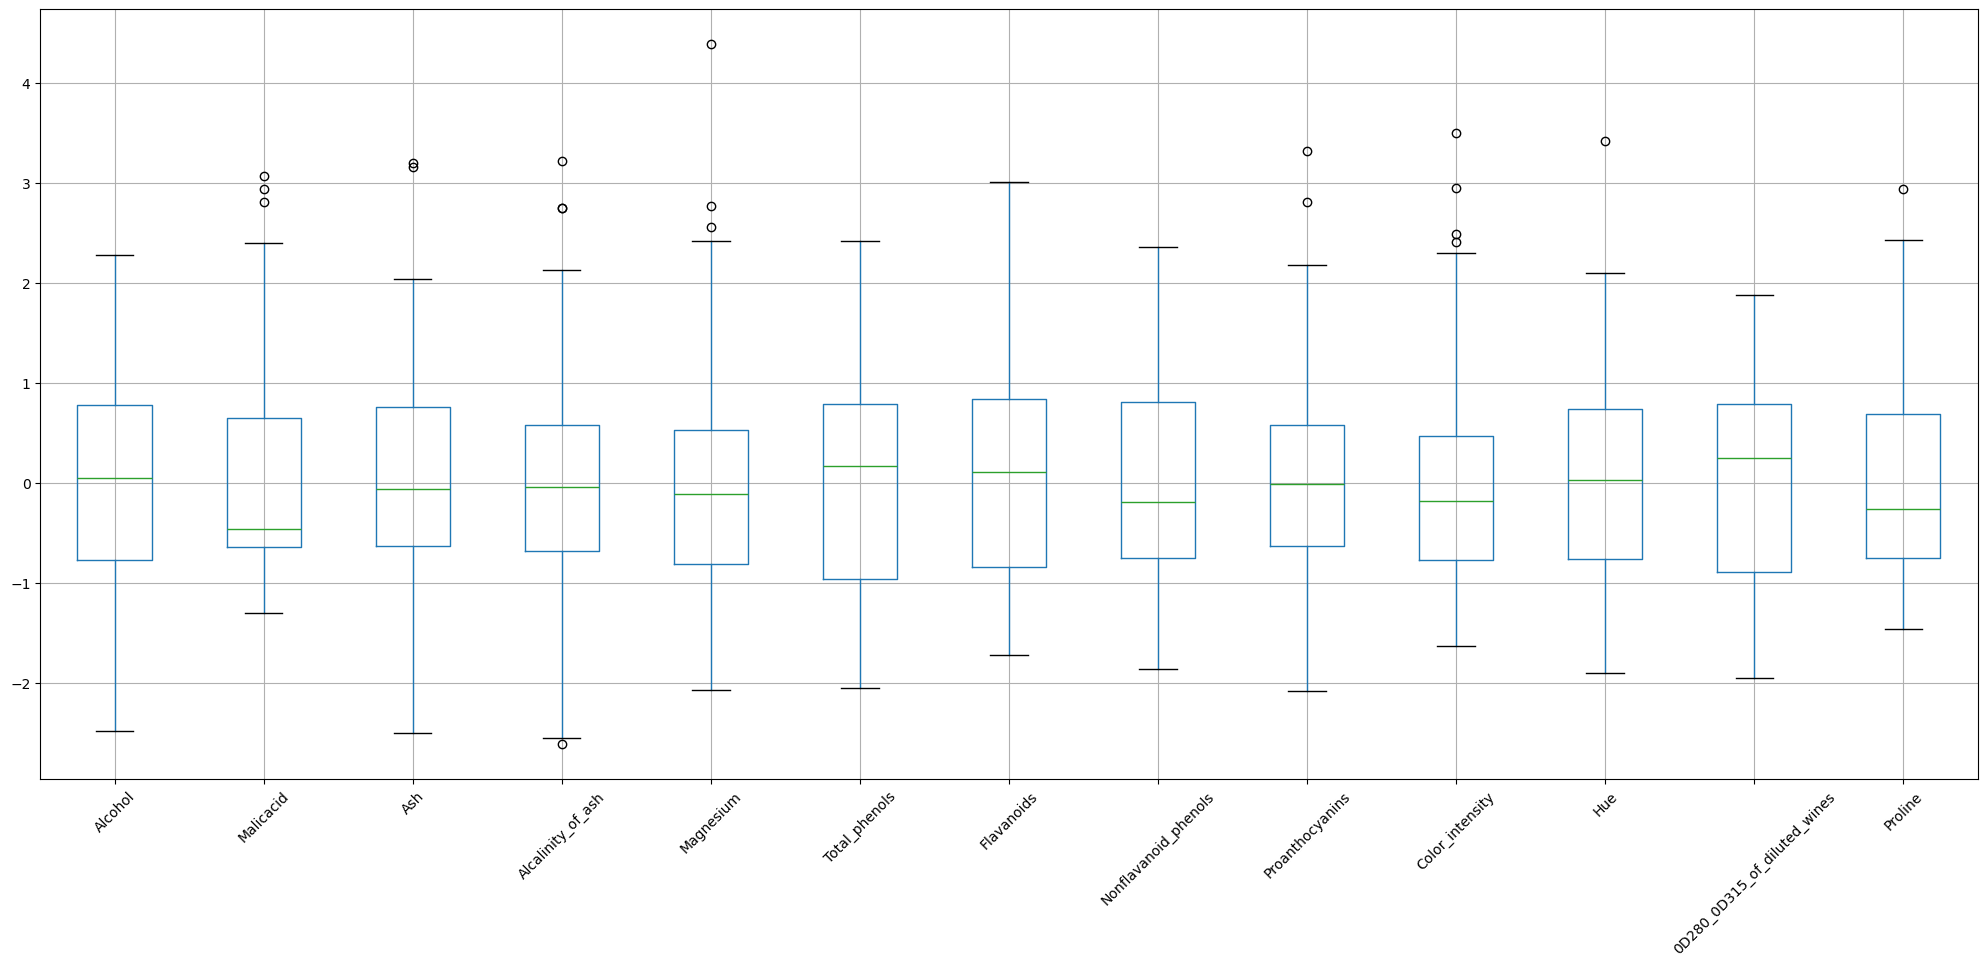

In [24]:
plt.rcParams["figure.figsize"] = [25, 10]
ax = x_train_df_normalized.boxplot(column= list(X.columns))
ax.set_xticklabels(list(X.columns), rotation=45)
plt.show()

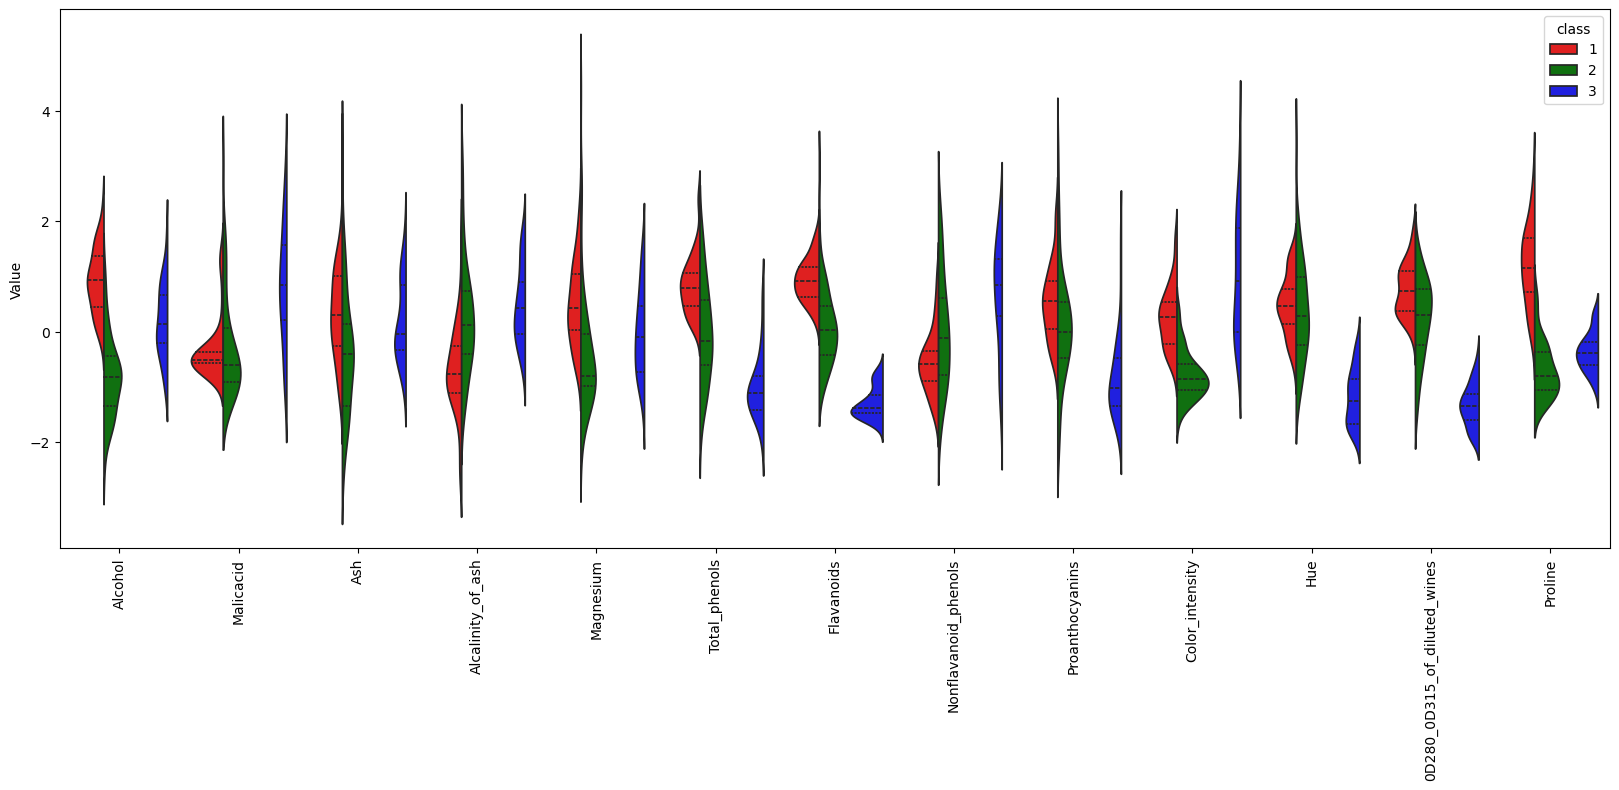

In [25]:
draw_distributions_box_plot(y_train_df,x_train_df_normalized, start_feature=0, end_feature=len(X.columns), label = label)

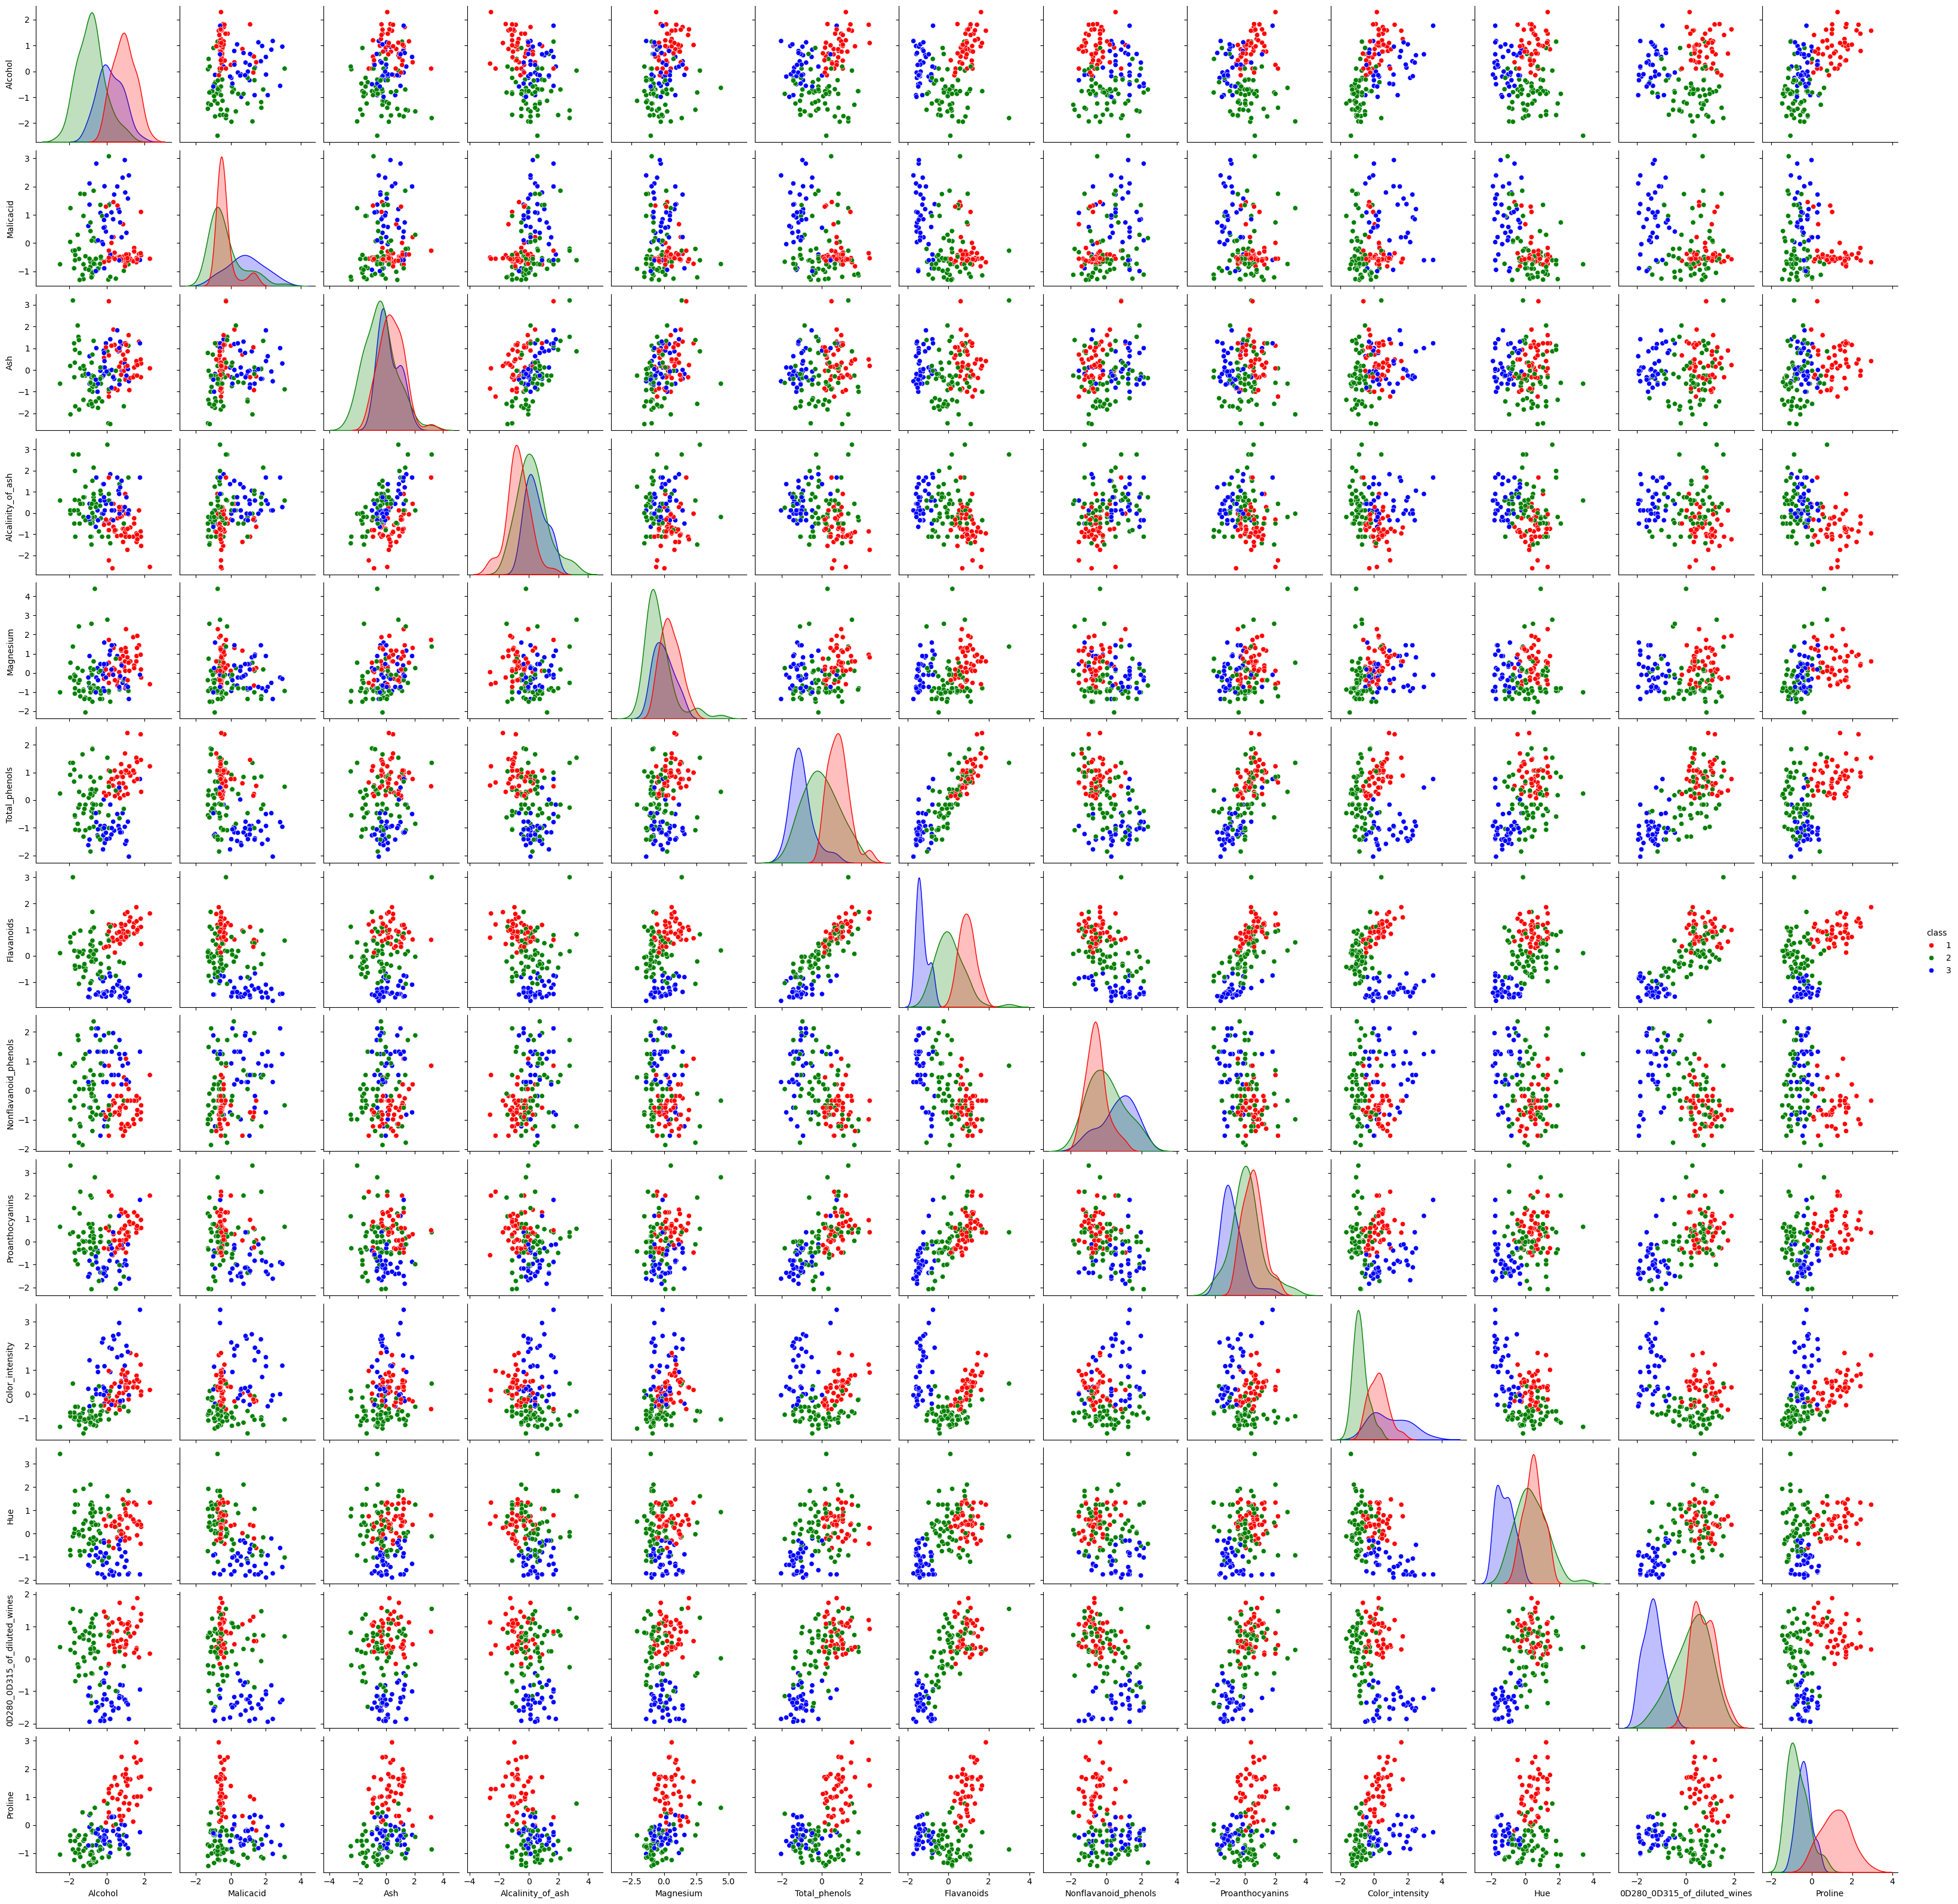

In [26]:
plot_pairplot(y_train_df, x_train_df_normalized, start_feature=0, end_feature=len(X.columns), label = 'class')

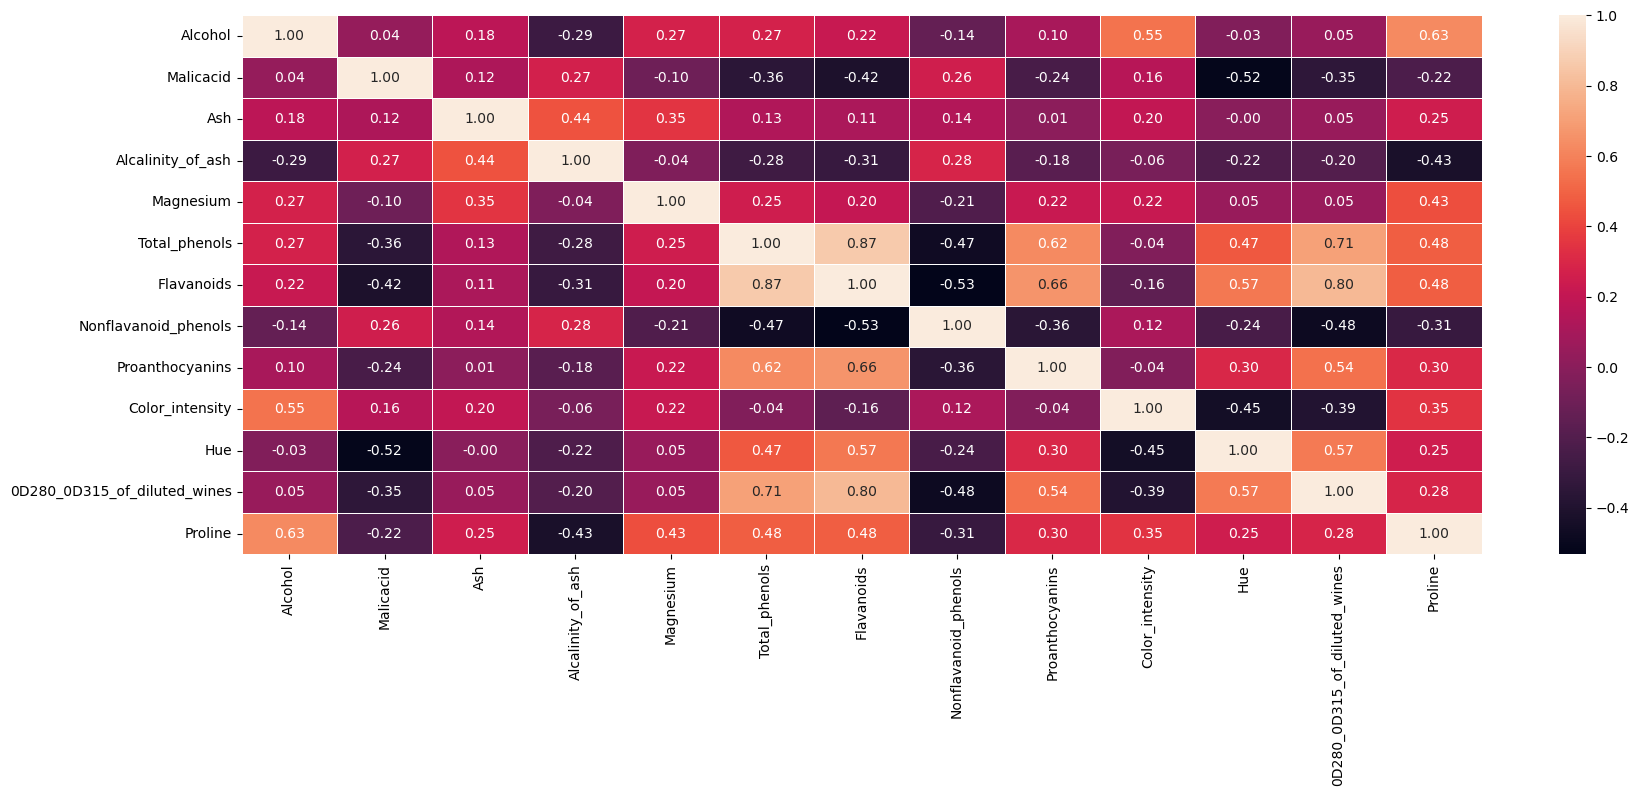

In [27]:
f,ax = plt.subplots(figsize=(20, 7))
sns.heatmap(x_train_df_normalized.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()